Challenge 2

- Use the data file "challenge2.gwf", with channel name "H1:CHALLENGE2"
- The data contain a BBH signal with m1=m2=30 solar masses, spin = 0.

1. What is the approximative time of the merger? (Hint: a plot of the q-transform could help)
2. Generate a time-domain template waveform using approximate "SEOBNRv4_opt". with the same parameters as above. Plot this waveform.
3. Calculate a PSD of the data, and plot this on a log-log scale. Use axes ranging from 20 Hz up to the Nyquist frequency.
Use the template waveform and PSD to calculate the SNR time series. Plot the SNR time-series.
4. What is the matched filter SNR of the signal?


The first step is to install the data for this challenge and the python packages LALSuite, GWpy and PyCBC that are used in the assignment. The data is downloaded from the internet using the wget command. The data is loaded into the memory using the TimeSeries.read method and assigned the name gwpy_strain while the data from the PyCBC package is given the name pycbc_strain. 

In [ ]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
# -- Click "restart runtime" in the runtime menu
! pip install matplotlib==3.1.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 2.1.3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Downloading the data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf

# -- for gwpy 
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")

# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')



--2022-02-14 18:13:41--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf’

challenge2.gwf      100%[===================>]   3.84M  5.56MB/s    in 0.7s    

2022-02-14 18:13:42 (5.56 MB/s) - ‘challenge2.gwf’ saved [4025842/4025842]



The nescessary methods are imported from the packages. 

In [ ]:
from pycbc.filter import matched_filter
import numpy
from pycbc.waveform import get_td_waveform
import pylab
from pycbc import frame
from pycbc.filter import matched_filter
import numpy
import pylab
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.psd import interpolate, inverse_spectrum_truncation

In [ ]:
print(gwpy_strain)
print('The sample rate of the data is:', gwpy_strain.sample_rate)

TimeSeries([ 8.75332715e-22,  1.27597248e-22,  1.88838802e-22,
            ..., -1.91886478e-23, -2.10989354e-22,
             2.30287965e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE2,
           channel: H1:CHALLENGE2)
The sample rate of the data is: 4096.0 Hz


The following code is used to plot the data from the challenge in the time domain. 

Text(0.5, 1.0, 'Time Domain')

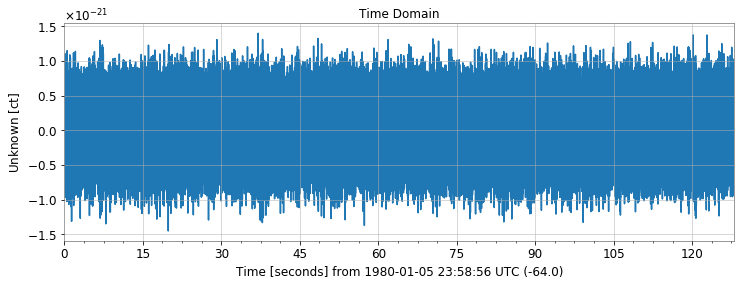

In [ ]:
%matplotlib inline
plot = gwpy_strain.plot()
ax = plot.gca()
ax.set_title('Time Domain')

The data is then plotted in a spectrogram. In the first spectrogram no signal can be observed so the colur scale is adjusted to fit the values. 

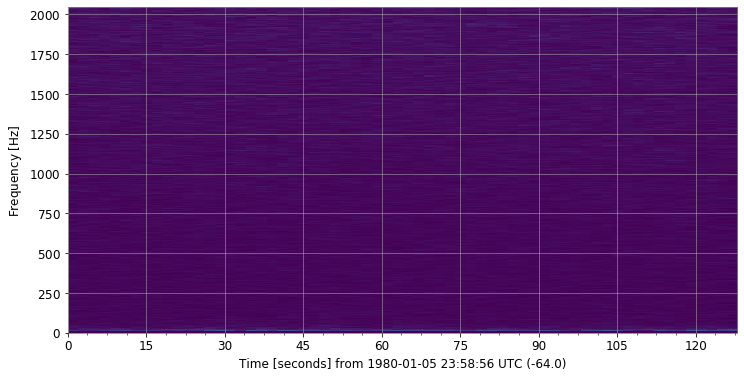

In [ ]:
specgram = gwpy_strain.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()


In the first spectrogram there can no signal be identified. So the colour scale is adjusted to fit the values.

In [ ]:
print(specgram.min())
print(specgram.max())

6.976805794527576e-29 ct / Hz(1/2)
2.0190607391269523e-22 ct / Hz(1/2)


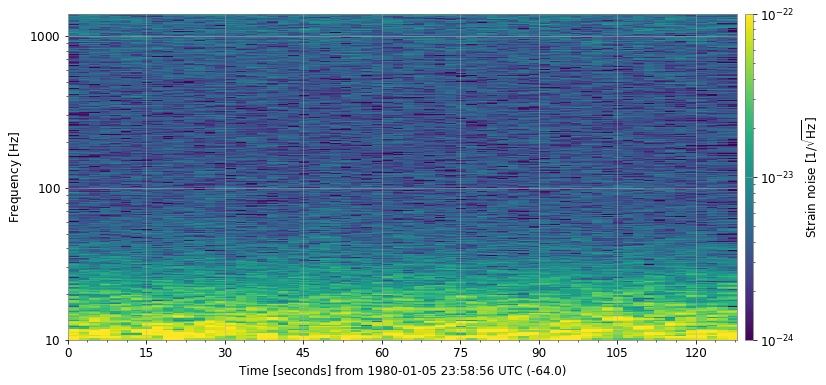

In [ ]:
# adjust colour scale
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-22),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot  # refresh

Even when adjusting the colour scale it is not possible to identify a signal. Therefore, a qtransform is plotted. Since it is unlikely that a signal is observed at frequencies below 10 or above 500 Hz thus the frange is chosen according to that. 

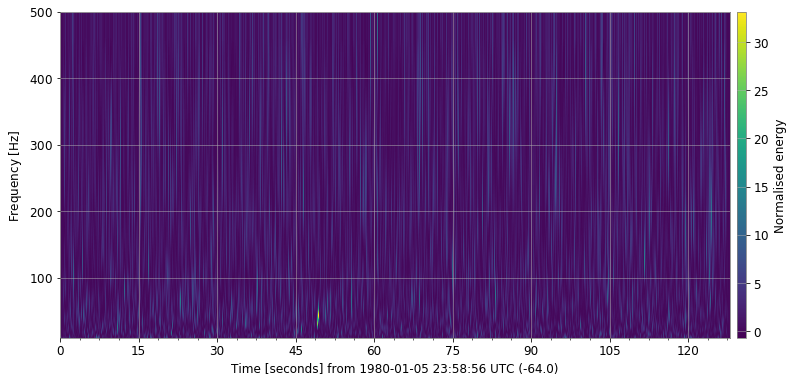

In [ ]:
# time frequency representation
# maybe change frange ???
hq = gwpy_strain.q_transform(frange=(10, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")



In the qtransform, there might be a signal observed at around 48 s. The qtransform is now adjusted by chnaging the qrange. This is done by testing what qrange gives the clearest results. Moreover, the plot is adjusted so that it shows the time interval around the time where the signal is expected. 

In [ ]:
epoch = gwpy_strain.epoch
print(epoch)

-64.0


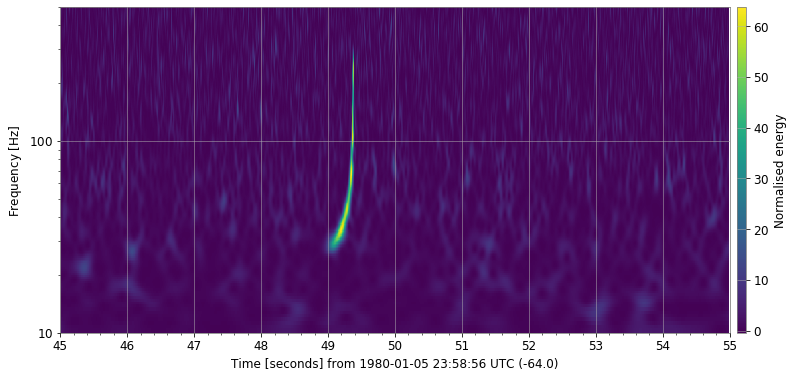

In [ ]:

# maybe adjust qrange???
hq = gwpy_strain.q_transform(frange=(10, 500), qrange=(10, 300), outseg=(-19,-9)) 
plot = hq.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.set_epoch(epoch)
ax.colorbar(label="Normalised energy")


In this plot we can see that the merger of the BBH is starting at aorund 49 s. 

In [ ]:
! pip install -q 'PyCBC==1.18.0' 'lalsuite==6.82'

     |████████████████████████████████| 6.3 MB 3.9 MB/s 
     |████████████████████████████████| 27.3 MB 1.4 MB/s 
     |████████████████████████████████| 201 kB 54.2 MB/s 
     |████████████████████████████████| 75 kB 3.9 MB/s 
     |████████████████████████████████| 51 kB 6.5 MB/s 
     |████████████████████████████████| 1.4 MB 64.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 295 kB 2.0 MB/s 
     |████████████████████████████████| 3.6 MB 37.4 MB/s 


In the next step, a template waveform is constructed for the plus and cross polarization for solar masses of 30 and a spin of 0. The possible waveforms are then plotted. For the template the approximation SEOBNRv4_opt is used. 

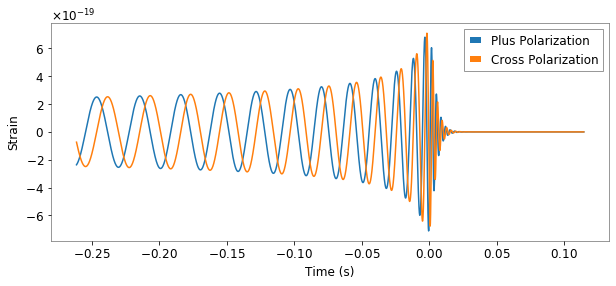

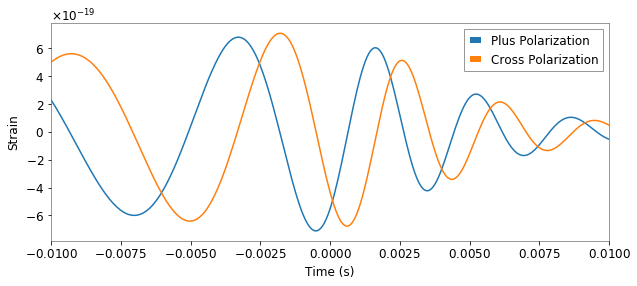

In [ ]:
%matplotlib inline

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/16384,
                         f_lower=30,
                         spin1z=0,
                         spin2z=0)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

In [ ]:
samplerate = pycbc_strain.sample_rate
nfrequency = samplerate/2
# deltaf = 1.0 / 128
samplelength = 4
print('The sampling rate is', samplerate, 'and the Nyquist frequency is', nfrequency, '.')


The sampling rate is 4096.0 and the Nyquist frequency is 2048.0 .


The PSD for the given data is calculated and plotted.

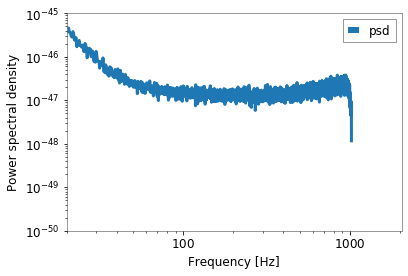

In [ ]:
psd = pycbc_strain.psd(samplelength)
# plot it:

pylab.loglog(psd.sample_frequencies, psd, linewidth=3, label='psd')
pylab.xlim(xmin=20, xmax=2048)
pylab.ylim(1e-50, 1e-45)
pylab.xlabel('Frequency [Hz]')
pylab.ylabel('Power spectral density')
pylab.legend()
pylab.grid()
pylab.show()

Now frequencies below 15 Hz are filtered out since they are not a signal. Then the data is downsampled to 2048 Hz which is the Nyquist frequency. This data is then plotted in the time domain. 

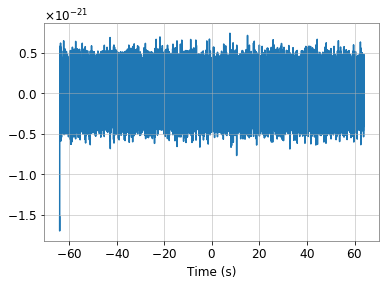

In [ ]:
pycbc_strain = highpass(pycbc_strain, 15.0)
pycbc_strain = resample_to_delta_t(pycbc_strain, 1.0/2048)

pylab.plot(pycbc_strain.sample_times, pycbc_strain)
pylab.xlabel('Time (s)')
pylab.show()

In the plot of the time domain we can observed an outliar in the first few seconds therefore the first and last seconds of the data are removed for the conditioned data.

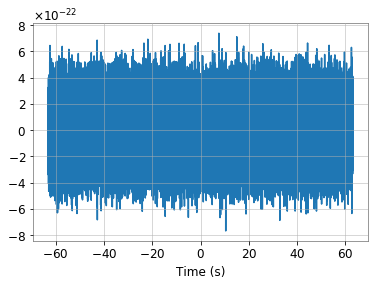

In [ ]:
conditioned = pycbc_strain.crop(1,1) 

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

We calculated the PSD for the conditioned data using 4 s samples since the duration of the data is 128 s which is divisible by 4. The PSD is then interpolated to match the data and 1/PSD is used as a filter. Again frequencies below 15 Hz are cutoff. 

In [ ]:
psd = conditioned.psd(4)

psd = interpolate(psd, conditioned.delta_f)

psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

Now we model a wave template for the conditoned data and plot it. 

In [ ]:
m = 30 # Solar masses
s = 0 # the spin is 0
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20,
                     spin1z=s,
                     spin2z=s)

# Resize the vector to match our data
hp.resize(len(conditioned))

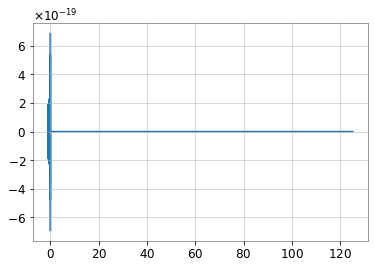

In [ ]:
pylab.plot(hp.sample_times, hp)

We use the plus polarized data for the next part. We shift the signal so that the start time is 0s. 

Text(0, 0.5, 'Strain')

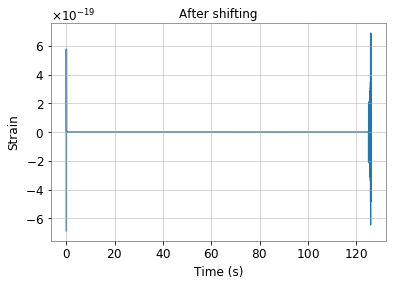

In [ ]:
template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')


Finally, we are able to calculate the SNR for our data. This is done by making a matched filter for the template and conditioned data. We then crop the SNR by 4 s in the beginning and the end and taking into account the template length and additional 4s are removed. SInce the matched filter gives us a complex number, we take the abs() value of the SNR. This takes into account both, the complex and imaginary part. The SNR is then plotted against the time and the maximum SNR is given. 

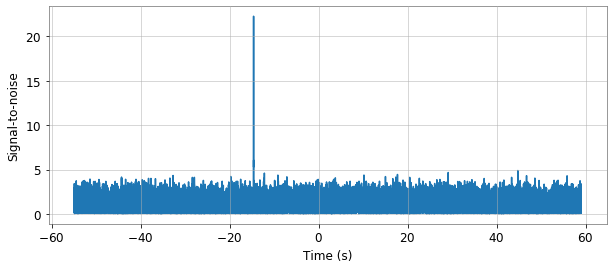

We found a signal at -14.6328125s with SNR 22.2540688085927


In [ ]:
snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

snr = snr.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, 
                                                    abs(snrp)))

The maximum SNR is found to be about 22 which is well above 8 so therefore we see that a signal is present. Moreover the signal is at -14.6s. Taking into account a shift in the x-axis we see that the signal is present at around 49 s. Similar to what was found in the qtransform.